# Results: Metrics, Visualizations, Statistics, Error Analysis

Notebook to keep track of our results for all the models we experimented with. The results from this notebook are used in our final writeup.

In [95]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline
from model_utils import *
from pyramid_wrapper import *
from data_utils import *
from constants import *
from utils import *
import vis
from tabulate import tabulate
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from tflearn.data_utils import to_categorical, pad_sequences
from sklearn.metrics import accuracy_score
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style


import pandas as pd
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Quantitative results

1. Pyramid model

In [4]:
pyramid_model = PyramidWrapper(checkpoint_model_id="pyramid_cifar100")

models loaded
Checkpoint loaded.


In [22]:
fine_label_names, coarse_label_names = load_cifar100_label_names(label_type='all')

load the full test set and do a linear search to find the best confidence threshold. If confidence higher than threshold, model will predict fine, otherwise will predict coarse

In [79]:
X, Y, fine_or_coarse = load_data_pyramid(return_subset='gate_only')

cifar100
loading cifar batch training batch 1 of 1
loading cifar batch testing batch 1 of 1
mean: 121.936059453
std dev: 67.2413055571
Normalizing data


In [81]:
print X.shape

(40000, 32, 32, 3)


In [83]:
evaluate_predictions(pyramid_model, X, Y, fine_or_coarse, confid_threshold=None)

Accuracy for coarse predictions: 0.6046
Accuracy for fine predictions: 0.442825
[ 76.16689801  99.99997616  99.99219179 ...,  82.46674538  49.65187013
  87.81691194]
predicted fine label 25313 times out of 40000 total samples.
confid_threshold: 60, Accuracy for predict coarse OR fine: 0.450075
[ 76.16689801  99.99997616  99.99219179 ...,  82.46674538  49.65187013
  87.81691194]
predicted fine label 24971 times out of 40000 total samples.
confid_threshold: 61, Accuracy for predict coarse OR fine: 0.4494
[ 76.16689801  99.99997616  99.99219179 ...,  82.46674538  49.65187013
  87.81691194]
predicted fine label 24645 times out of 40000 total samples.
confid_threshold: 62, Accuracy for predict coarse OR fine: 0.448675
[ 76.16689801  99.99997616  99.99219179 ...,  82.46674538  49.65187013
  87.81691194]
predicted fine label 24291 times out of 40000 total samples.
confid_threshold: 63, Accuracy for predict coarse OR fine: 0.44775
[ 76.16689801  99.99997616  99.99219179 ...,  82.46674538  49.6

In [91]:
best_confid_threshold = 68

In [92]:
X, Y, fine_or_coarse = load_data_pyramid(return_subset='test_only')

cifar100
loading cifar batch training batch 1 of 1
loading cifar batch testing batch 1 of 1
mean: 121.936059453
std dev: 67.2413055571
Normalizing data


In [93]:
evaluate_predictions(pyramid_model, X, Y, fine_or_coarse, confid_threshold=best_confid_threshold)

Accuracy for coarse predictions: 0.4419
Accuracy for fine predictions: 0.2435
predicted fine label 4683 times out of 10000 total samples.
confid_threshold: 68, hierarchical accuracy: 0.2767


Load the test data subsets

In [7]:
X_test_A, y_test_A, fine_or_coarse_A, X_test_B, y_test_B, fine_or_coarse_B, X_test_C, y_test_C, fine_or_coarse_C = load_pyramid_test_subset(test_subset="all")

cifar100
loading cifar batch training batch 1 of 1
loading cifar batch testing batch 1 of 1
mean: 121.936059453
std dev: 67.2413055571
Normalizing data


Test subset A: Contains all test samples belonging to the fine-grained classes the CNN part of the model has trained on before and where the model was fed both fine and coarse classes. (2 fine-granded classes per coarse class, 40% of the test set)

In [86]:

evaluate_predictions(pyramid_model, X_test_A, y_test_A, fine_or_coarse_A, confid_threshold=best_confid_threshold)

Accuracy for coarse predictions: 0.65075
Accuracy for fine predictions: 0.60875
predicted fine label 2380 times out of 4000 total samples.
confid_threshold: 68, hierarchical accuracy: 0.4805


Test subset B: Contains all test samples belong to the 40 fine classes, where the model has only seen their coarse label, but not their fine label. (2 fine-granded classes per coarse class, 40% of the test set)

In [87]:
evaluate_predictions(pyramid_model, X_test_B, y_test_B, fine_or_coarse_B, confid_threshold=best_confid_threshold)

Accuracy for coarse predictions: 0.2915
Accuracy for fine predictions: 0.0
predicted fine label 1475 times out of 4000 total samples.
confid_threshold: 68, hierarchical accuracy: 0.1425


Test subset C: Contains all test samples belong to the 20 fine classes, the model has never seen before. (where seen refers to the labels.) (1 fine-granded class per coarse class, 20% of the test set)

In [88]:
evaluate_predictions(pyramid_model, X_test_C, y_test_C, fine_or_coarse_C, confid_threshold=best_confid_threshold)

Accuracy for coarse predictions: 0.325
Accuracy for fine predictions: 0.0
predicted fine label 828 times out of 2000 total samples.
confid_threshold: 68, hierarchical accuracy: 0.1375


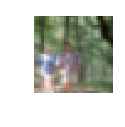

|        | Predicted Label              | Model Choice   | True Label                   |
|--------+------------------------------+----------------+------------------------------|
| coarse | large_natural_outdoor_scenes |                | large_natural_outdoor_scenes |
| fine   | forest                       | X              | forest                       |


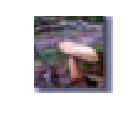

|        | Predicted Label          | Model Choice   | True Label           |
|--------+--------------------------+----------------+----------------------|
| coarse | non-insect_invertebrates | X              | fruit_and_vegetables |
| fine   | camel                    |                | mushroom             |


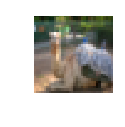

|        | Predicted Label                | Model Choice   | True Label                     |
|--------+--------------------------------+----------------+--------------------------------|
| coarse | large_omnivores_and_herbivores |                | large_omnivores_and_herbivores |
| fine   | camel                          | X              | camel                          |


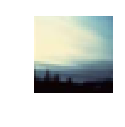

|        | Predicted Label              | Model Choice   | True Label                   |
|--------+------------------------------+----------------+------------------------------|
| coarse | large_natural_outdoor_scenes |                | large_natural_outdoor_scenes |
| fine   | cloud                        | X              | cloud                        |


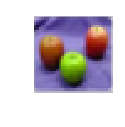

|        | Predicted Label      | Model Choice   | True Label           |
|--------+----------------------+----------------+----------------------|
| coarse | fruit_and_vegetables |                | fruit_and_vegetables |
| fine   | apple                | X              | apple                |


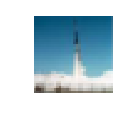

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | vehicles_2        |                | vehicles_2   |
| fine   | rocket            | X              | rocket       |


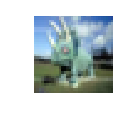

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | trees             | X              | reptiles     |
| fine   | maple_tree        |                | dinosaur     |


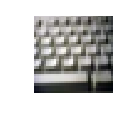

|        | Predicted Label              | Model Choice   | True Label                   |
|--------+------------------------------+----------------+------------------------------|
| coarse | household_electrical_devices |                | household_electrical_devices |
| fine   | keyboard                     | X              | keyboard                     |


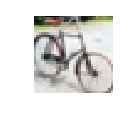

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | vehicles_1        |                | vehicles_1   |
| fine   | bicycle           | X              | bicycle      |


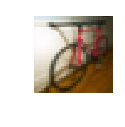

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | food_containers   | X              | vehicles_1   |
| fine   | boy               |                | bicycle      |


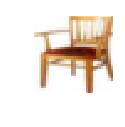

|        | Predicted Label     | Model Choice   | True Label          |
|--------+---------------------+----------------+---------------------|
| coarse | household_furniture |                | household_furniture |
| fine   | chair               | X              | chair               |


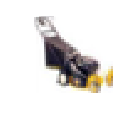

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | vehicles_2        |                | vehicles_2   |
| fine   | lawn_mower        | X              | lawn_mower   |


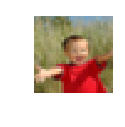

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | people            | X              | people       |
| fine   | boy               |                | boy          |


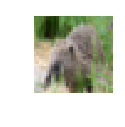

|        | Predicted Label   | Model Choice   | True Label     |
|--------+-------------------+----------------+----------------|
| coarse | medium_mammals    |                | medium_mammals |
| fine   | porcupine         | X              | porcupine      |


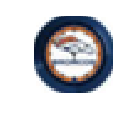

|        | Predicted Label              | Model Choice   | True Label                   |
|--------+------------------------------+----------------+------------------------------|
| coarse | household_electrical_devices |                | household_electrical_devices |
| fine   | clock                        | X              | clock                        |


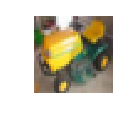

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | fish              |                | vehicles_2   |
| fine   | lawn_mower        | X              | lawn_mower   |


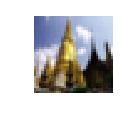

|        | Predicted Label               | Model Choice   | True Label                    |
|--------+-------------------------------+----------------+-------------------------------|
| coarse | large_man-made_outdoor_things | X              | large_man-made_outdoor_things |
| fine   | castle                        |                | castle                        |


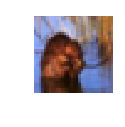

|        | Predicted Label   | Model Choice   | True Label      |
|--------+-------------------+----------------+-----------------|
| coarse | insects           | X              | aquatic_mammals |
| fine   | lobster           |                | beaver          |


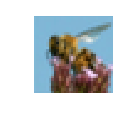

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | insects           |                | insects      |
| fine   | bee               | X              | bee          |


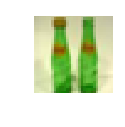

|        | Predicted Label   | Model Choice   | True Label      |
|--------+-------------------+----------------+-----------------|
| coarse | food_containers   |                | food_containers |
| fine   | bottle            | X              | bottle          |


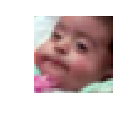

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | people            | X              | people       |
| fine   | boy               |                | baby         |


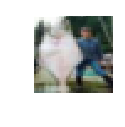

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | fish              | X              | fish         |
| fine   | flatfish          |                | flatfish     |


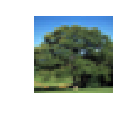

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | trees             | X              | trees        |
| fine   | maple_tree        |                | oak_tree     |


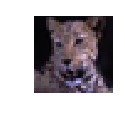

|        | Predicted Label   | Model Choice   | True Label       |
|--------+-------------------+----------------+------------------|
| coarse | large_carnivores  |                | large_carnivores |
| fine   | leopard           | X              | leopard          |


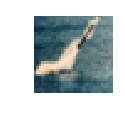

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | aquatic_mammals   |                | vehicles_2   |
| fine   | dolphin           | X              | rocket       |


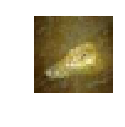

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | reptiles          | X              | reptiles     |
| fine   | crocodile         |                | crocodile    |


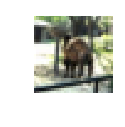

|        | Predicted Label   | Model Choice   | True Label                     |
|--------+-------------------+----------------+--------------------------------|
| coarse | large_carnivores  | X              | large_omnivores_and_herbivores |
| fine   | cattle            |                | camel                          |


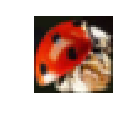

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | flowers           |                | insects      |
| fine   | lobster           | X              | beetle       |


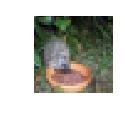

|        | Predicted Label   | Model Choice   | True Label     |
|--------+-------------------+----------------+----------------|
| coarse | medium_mammals    |                | medium_mammals |
| fine   | porcupine         | X              | porcupine      |


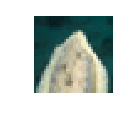

|        | Predicted Label              | Model Choice   | True Label   |
|--------+------------------------------+----------------+--------------|
| coarse | large_natural_outdoor_scenes | X              | fish         |
| fine   | cloud                        |                | flatfish     |


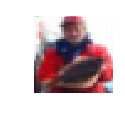

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | fish              |                | fish         |
| fine   | flatfish          | X              | flatfish     |


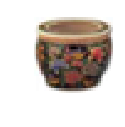

|        | Predicted Label              | Model Choice   | True Label      |
|--------+------------------------------+----------------+-----------------|
| coarse | household_electrical_devices |                | food_containers |
| fine   | bowl                         | X              | bowl            |


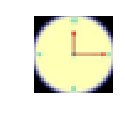

|        | Predicted Label      | Model Choice   | True Label                   |
|--------+----------------------+----------------+------------------------------|
| coarse | fruit_and_vegetables |                | household_electrical_devices |
| fine   | apple                | X              | clock                        |


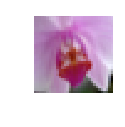

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | flowers           |                | flowers      |
| fine   | orchid            | X              | orchid       |


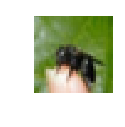

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | insects           | X              | insects      |
| fine   | bee               |                | bee          |


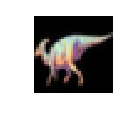

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | reptiles          |                | reptiles     |
| fine   | dinosaur          | X              | dinosaur     |


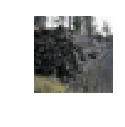

|        | Predicted Label              | Model Choice   | True Label                   |
|--------+------------------------------+----------------+------------------------------|
| coarse | large_natural_outdoor_scenes | X              | large_natural_outdoor_scenes |
| fine   | forest                       |                | forest                       |


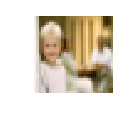

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | food_containers   | X              | people       |
| fine   | bed               |                | boy          |


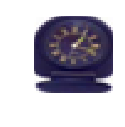

|        | Predicted Label              | Model Choice   | True Label                   |
|--------+------------------------------+----------------+------------------------------|
| coarse | household_electrical_devices | X              | household_electrical_devices |
| fine   | keyboard                     |                | clock                        |


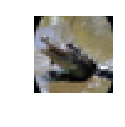

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | reptiles          | X              | reptiles     |
| fine   | beaver            |                | crocodile    |


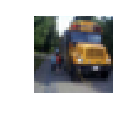

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | vehicles_1        |                | vehicles_1   |
| fine   | bus               | X              | bus          |


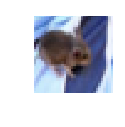

|        | Predicted Label   | Model Choice   | True Label    |
|--------+-------------------+----------------+---------------|
| coarse | small_mammals     | X              | small_mammals |
| fine   | mouse             |                | mouse         |


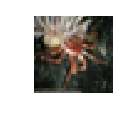

|        | Predicted Label          | Model Choice   | True Label               |
|--------+--------------------------+----------------+--------------------------|
| coarse | non-insect_invertebrates |                | non-insect_invertebrates |
| fine   | forest                   | X              | crab                     |


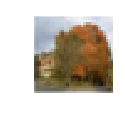

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | trees             |                | trees        |
| fine   | maple_tree        | X              | maple_tree   |


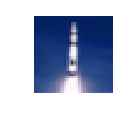

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | vehicles_2        |                | vehicles_2   |
| fine   | rocket            | X              | rocket       |


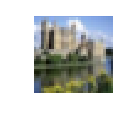

|        | Predicted Label               | Model Choice   | True Label                    |
|--------+-------------------------------+----------------+-------------------------------|
| coarse | large_man-made_outdoor_things |                | large_man-made_outdoor_things |
| fine   | castle                        | X              | castle                        |


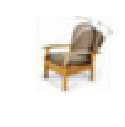

|        | Predicted Label     | Model Choice   | True Label          |
|--------+---------------------+----------------+---------------------|
| coarse | household_furniture |                | household_furniture |
| fine   | chair               | X              | chair               |


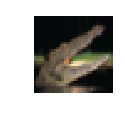

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | reptiles          |                | reptiles     |
| fine   | crocodile         | X              | crocodile    |


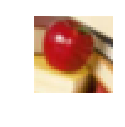

|        | Predicted Label      | Model Choice   | True Label           |
|--------+----------------------+----------------+----------------------|
| coarse | fruit_and_vegetables | X              | fruit_and_vegetables |
| fine   | apple                |                | apple                |


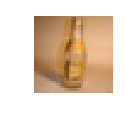

|        | Predicted Label   | Model Choice   | True Label      |
|--------+-------------------+----------------+-----------------|
| coarse | food_containers   |                | food_containers |
| fine   | bottle            | X              | bottle          |


In [85]:
examine_images_and_predictions_pyramid(pyramid_model, X_test_A, y_test_A)

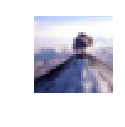

|        | Predicted Label   | Model Choice   | True Label                   |
|--------+-------------------+----------------+------------------------------|
| coarse | aquatic_mammals   |                | large_natural_outdoor_scenes |
| fine   | dolphin           | X              | mountain                     |


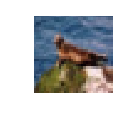

|        | Predicted Label                | Model Choice   | True Label      |
|--------+--------------------------------+----------------+-----------------|
| coarse | large_omnivores_and_herbivores | X              | aquatic_mammals |
| fine   | crocodile                      |                | seal            |


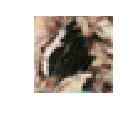

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | small_mammals     | X              | insects      |
| fine   | beetle            |                | butterfly    |


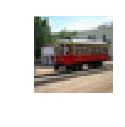

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | vehicles_1        |                | vehicles_2   |
| fine   | bus               | X              | streetcar    |


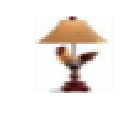

|        | Predicted Label   | Model Choice   | True Label                   |
|--------+-------------------+----------------+------------------------------|
| coarse | food_containers   |                | household_electrical_devices |
| fine   | chair             | X              | lamp                         |


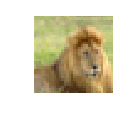

|        | Predicted Label                | Model Choice   | True Label       |
|--------+--------------------------------+----------------+------------------|
| coarse | large_omnivores_and_herbivores | X              | large_carnivores |
| fine   | crab                           |                | lion             |


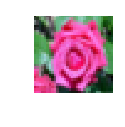

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | flowers           |                | flowers      |
| fine   | orchid            | X              | rose         |


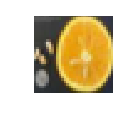

|        | Predicted Label   | Model Choice   | True Label           |
|--------+-------------------+----------------+----------------------|
| coarse | flowers           |                | fruit_and_vegetables |
| fine   | apple             | X              | orange               |


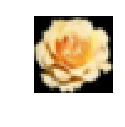

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | food_containers   |                | flowers      |
| fine   | hamster           | X              | rose         |


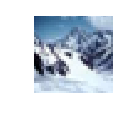

|        | Predicted Label               | Model Choice   | True Label                   |
|--------+-------------------------------+----------------+------------------------------|
| coarse | large_man-made_outdoor_things | X              | large_natural_outdoor_scenes |
| fine   | keyboard                      |                | mountain                     |


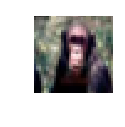

|        | Predicted Label   | Model Choice   | True Label                     |
|--------+-------------------+----------------+--------------------------------|
| coarse | people            | X              | large_omnivores_and_herbivores |
| fine   | boy               |                | chimpanzee                     |


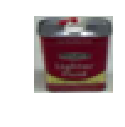

|        | Predicted Label   | Model Choice   | True Label      |
|--------+-------------------+----------------+-----------------|
| coarse | food_containers   | X              | food_containers |
| fine   | bowl              |                | can             |


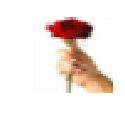

|        | Predicted Label          | Model Choice   | True Label   |
|--------+--------------------------+----------------+--------------|
| coarse | non-insect_invertebrates | X              | flowers      |
| fine   | lobster                  |                | rose         |


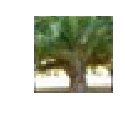

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | reptiles          | X              | trees        |
| fine   | dinosaur          |                | palm_tree    |


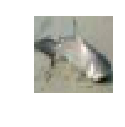

|        | Predicted Label                | Model Choice   | True Label   |
|--------+--------------------------------+----------------+--------------|
| coarse | large_omnivores_and_herbivores | X              | fish         |
| fine   | bicycle                        |                | shark        |


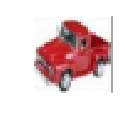

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | vehicles_2        |                | vehicles_1   |
| fine   | crab              | X              | pickup_truck |


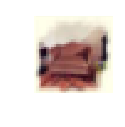

|        | Predicted Label   | Model Choice   | True Label          |
|--------+-------------------+----------------+---------------------|
| coarse | people            |                | household_furniture |
| fine   | bowl              | X              | couch               |


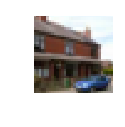

|        | Predicted Label               | Model Choice   | True Label                    |
|--------+-------------------------------+----------------+-------------------------------|
| coarse | large_man-made_outdoor_things | X              | large_man-made_outdoor_things |
| fine   | beaver                        |                | house                         |


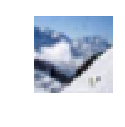

|        | Predicted Label              | Model Choice   | True Label                   |
|--------+------------------------------+----------------+------------------------------|
| coarse | household_electrical_devices |                | large_natural_outdoor_scenes |
| fine   | flatfish                     | X              | mountain                     |


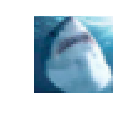

|        | Predicted Label              | Model Choice   | True Label   |
|--------+------------------------------+----------------+--------------|
| coarse | large_natural_outdoor_scenes |                | fish         |
| fine   | dolphin                      | X              | shark        |


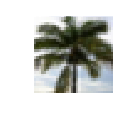

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | reptiles          |                | trees        |
| fine   | maple_tree        | X              | palm_tree    |


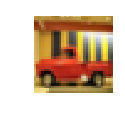

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | vehicles_1        | X              | vehicles_1   |
| fine   | bed               |                | pickup_truck |


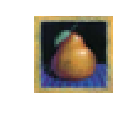

|        | Predicted Label   | Model Choice   | True Label           |
|--------+-------------------+----------------+----------------------|
| coarse | fish              |                | fruit_and_vegetables |
| fine   | bowl              | X              | pear                 |


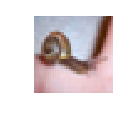

|        | Predicted Label                | Model Choice   | True Label               |
|--------+--------------------------------+----------------+--------------------------|
| coarse | large_omnivores_and_herbivores | X              | non-insect_invertebrates |
| fine   | bottle                         |                | snail                    |


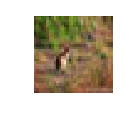

|        | Predicted Label              | Model Choice   | True Label    |
|--------+------------------------------+----------------+---------------|
| coarse | large_natural_outdoor_scenes | X              | small_mammals |
| fine   | forest                       |                | rabbit        |


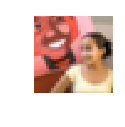

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | people            | X              | people       |
| fine   | apple             |                | girl         |


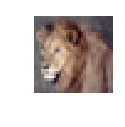

|        | Predicted Label   | Model Choice   | True Label       |
|--------+-------------------+----------------+------------------|
| coarse | large_carnivores  | X              | large_carnivores |
| fine   | leopard           |                | lion             |


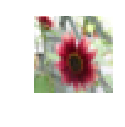

|        | Predicted Label          | Model Choice   | True Label   |
|--------+--------------------------+----------------+--------------|
| coarse | non-insect_invertebrates | X              | flowers      |
| fine   | orchid                   |                | sunflower    |


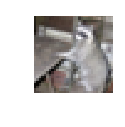

|        | Predicted Label   | Model Choice   | True Label     |
|--------+-------------------+----------------+----------------|
| coarse | vehicles_1        |                | medium_mammals |
| fine   | bicycle           | X              | raccoon        |


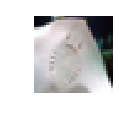

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | people            | X              | fish         |
| fine   | keyboard          |                | ray          |


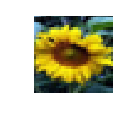

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | flowers           |                | flowers      |
| fine   | poppy             | X              | sunflower    |


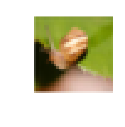

|        | Predicted Label      | Model Choice   | True Label               |
|--------+----------------------+----------------+--------------------------|
| coarse | fruit_and_vegetables | X              | non-insect_invertebrates |
| fine   | fox                  |                | snail                    |


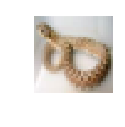

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | small_mammals     | X              | reptiles     |
| fine   | bed               |                | snake        |


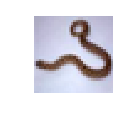

|        | Predicted Label          | Model Choice   | True Label   |
|--------+--------------------------+----------------+--------------|
| coarse | non-insect_invertebrates | X              | reptiles     |
| fine   | baby                     |                | snake        |


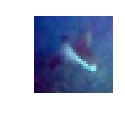

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | aquatic_mammals   | X              | fish         |
| fine   | dolphin           |                | ray          |


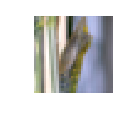

|        | Predicted Label              | Model Choice   | True Label   |
|--------+------------------------------+----------------+--------------|
| coarse | large_natural_outdoor_scenes | X              | insects      |
| fine   | bottle                       |                | caterpillar  |


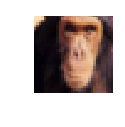

|        | Predicted Label   | Model Choice   | True Label                     |
|--------+-------------------+----------------+--------------------------------|
| coarse | small_mammals     | X              | large_omnivores_and_herbivores |
| fine   | clock             |                | chimpanzee                     |


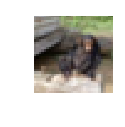

|        | Predicted Label   | Model Choice   | True Label                     |
|--------+-------------------+----------------+--------------------------------|
| coarse | aquatic_mammals   | X              | large_omnivores_and_herbivores |
| fine   | bear              |                | chimpanzee                     |


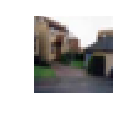

|        | Predicted Label               | Model Choice   | True Label                    |
|--------+-------------------------------+----------------+-------------------------------|
| coarse | large_man-made_outdoor_things |                | large_man-made_outdoor_things |
| fine   | bridge                        | X              | house                         |


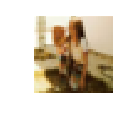

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | reptiles          | X              | people       |
| fine   | dinosaur          |                | girl         |


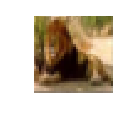

|        | Predicted Label   | Model Choice   | True Label       |
|--------+-------------------+----------------+------------------|
| coarse | aquatic_mammals   | X              | large_carnivores |
| fine   | bear              |                | lion             |


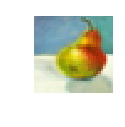

|        | Predicted Label      | Model Choice   | True Label           |
|--------+----------------------+----------------+----------------------|
| coarse | fruit_and_vegetables |                | fruit_and_vegetables |
| fine   | apple                | X              | pear                 |


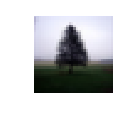

|        | Predicted Label               | Model Choice   | True Label   |
|--------+-------------------------------+----------------+--------------|
| coarse | large_man-made_outdoor_things | X              | trees        |
| fine   | maple_tree                    |                | pine_tree    |


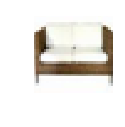

|        | Predicted Label     | Model Choice   | True Label          |
|--------+---------------------+----------------+---------------------|
| coarse | household_furniture |                | household_furniture |
| fine   | bed                 | X              | couch               |


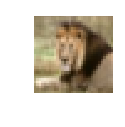

|        | Predicted Label   | Model Choice   | True Label       |
|--------+-------------------+----------------+------------------|
| coarse | large_carnivores  | X              | large_carnivores |
| fine   | leopard           |                | lion             |


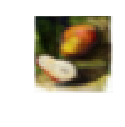

|        | Predicted Label   | Model Choice   | True Label           |
|--------+-------------------+----------------+----------------------|
| coarse | flowers           |                | fruit_and_vegetables |
| fine   | poppy             | X              | pear                 |


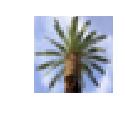

|        | Predicted Label          | Model Choice   | True Label   |
|--------+--------------------------+----------------+--------------|
| coarse | non-insect_invertebrates |                | trees        |
| fine   | bee                      | X              | palm_tree    |


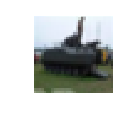

|        | Predicted Label               | Model Choice   | True Label   |
|--------+-------------------------------+----------------+--------------|
| coarse | large_man-made_outdoor_things | X              | vehicles_2   |
| fine   | castle                        |                | tank         |


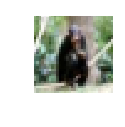

|        | Predicted Label   | Model Choice   | True Label                     |
|--------+-------------------+----------------+--------------------------------|
| coarse | large_carnivores  |                | large_omnivores_and_herbivores |
| fine   | bear              | X              | chimpanzee                     |


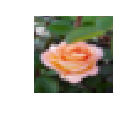

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | fish              | X              | flowers      |
| fine   | aquarium_fish     |                | rose         |


In [89]:
examine_images_and_predictions_pyramid(pyramid_model, X_test_B, y_test_B)

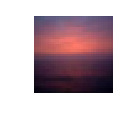

|        | Predicted Label              | Model Choice   | True Label                   |
|--------+------------------------------+----------------+------------------------------|
| coarse | large_natural_outdoor_scenes |                | large_natural_outdoor_scenes |
| fine   | cloud                        | X              | sea                          |


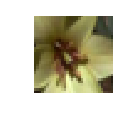

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | insects           |                | flowers      |
| fine   | bee               | X              | tulip        |


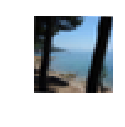

|        | Predicted Label              | Model Choice   | True Label                   |
|--------+------------------------------+----------------+------------------------------|
| coarse | household_electrical_devices | X              | large_natural_outdoor_scenes |
| fine   | keyboard                     |                | sea                          |


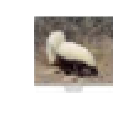

|        | Predicted Label   | Model Choice   | True Label     |
|--------+-------------------+----------------+----------------|
| coarse | reptiles          |                | medium_mammals |
| fine   | crocodile         | X              | skunk          |


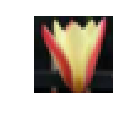

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | flowers           |                | flowers      |
| fine   | apple             | X              | tulip        |


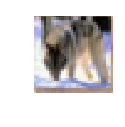

|        | Predicted Label   | Model Choice   | True Label       |
|--------+-------------------+----------------+------------------|
| coarse | small_mammals     | X              | large_carnivores |
| fine   | mouse             |                | wolf             |


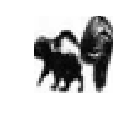

|        | Predicted Label   | Model Choice   | True Label     |
|--------+-------------------+----------------+----------------|
| coarse | fish              | X              | medium_mammals |
| fine   | camel             |                | skunk          |


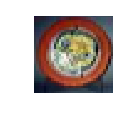

|        | Predicted Label              | Model Choice   | True Label      |
|--------+------------------------------+----------------+-----------------|
| coarse | household_electrical_devices |                | food_containers |
| fine   | clock                        | X              | plate           |


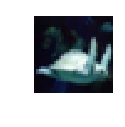

|        | Predicted Label              | Model Choice   | True Label   |
|--------+------------------------------+----------------+--------------|
| coarse | household_electrical_devices | X              | reptiles     |
| fine   | bowl                         |                | turtle       |


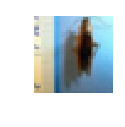

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | food_containers   | X              | insects      |
| fine   | flatfish          |                | cockroach    |


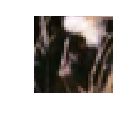

|        | Predicted Label               | Model Choice   | True Label     |
|--------+-------------------------------+----------------+----------------|
| coarse | large_man-made_outdoor_things | X              | medium_mammals |
| fine   | cattle                        |                | skunk          |


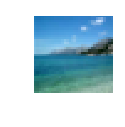

|        | Predicted Label   | Model Choice   | True Label                   |
|--------+-------------------+----------------+------------------------------|
| coarse | aquatic_mammals   |                | large_natural_outdoor_scenes |
| fine   | dolphin           | X              | sea                          |


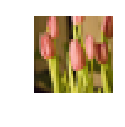

|        | Predicted Label              | Model Choice   | True Label   |
|--------+------------------------------+----------------+--------------|
| coarse | large_natural_outdoor_scenes |                | flowers      |
| fine   | bottle                       | X              | tulip        |


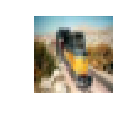

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | vehicles_1        | X              | vehicles_1   |
| fine   | bear              |                | train        |


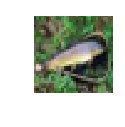

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | fish              |                | fish         |
| fine   | mushroom          | X              | trout        |


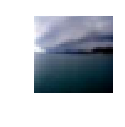

|        | Predicted Label              | Model Choice   | True Label                   |
|--------+------------------------------+----------------+------------------------------|
| coarse | large_natural_outdoor_scenes | X              | large_natural_outdoor_scenes |
| fine   | dolphin                      |                | sea                          |


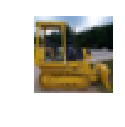

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | vehicles_1        | X              | vehicles_2   |
| fine   | bus               |                | tractor      |


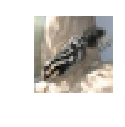

|        | Predicted Label   | Model Choice   | True Label     |
|--------+-------------------+----------------+----------------|
| coarse | insects           | X              | medium_mammals |
| fine   | beetle            |                | skunk          |


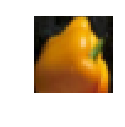

|        | Predicted Label   | Model Choice   | True Label           |
|--------+-------------------+----------------+----------------------|
| coarse | fish              |                | fruit_and_vegetables |
| fine   | aquarium_fish     | X              | sweet_pepper         |


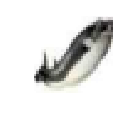

|        | Predicted Label          | Model Choice   | True Label      |
|--------+--------------------------+----------------+-----------------|
| coarse | non-insect_invertebrates | X              | aquatic_mammals |
| fine   | keyboard                 |                | whale           |


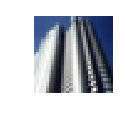

|        | Predicted Label              | Model Choice   | True Label                    |
|--------+------------------------------+----------------+-------------------------------|
| coarse | large_natural_outdoor_scenes | X              | large_man-made_outdoor_things |
| fine   | forest                       |                | skyscraper                    |


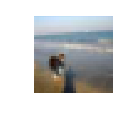

|        | Predicted Label                | Model Choice   | True Label                   |
|--------+--------------------------------+----------------+------------------------------|
| coarse | large_omnivores_and_herbivores | X              | large_natural_outdoor_scenes |
| fine   | rocket                         |                | sea                          |


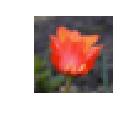

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | flowers           |                | flowers      |
| fine   | poppy             | X              | tulip        |


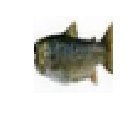

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | fish              | X              | fish         |
| fine   | bed               |                | trout        |


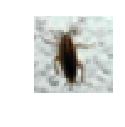

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | large_carnivores  | X              | insects      |
| fine   | bear              |                | cockroach    |


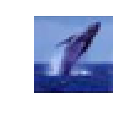

|        | Predicted Label   | Model Choice   | True Label      |
|--------+-------------------+----------------+-----------------|
| coarse | aquatic_mammals   |                | aquatic_mammals |
| fine   | dolphin           | X              | whale           |


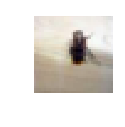

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | large_carnivores  | X              | insects      |
| fine   | beetle            |                | cockroach    |


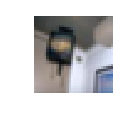

|        | Predicted Label   | Model Choice   | True Label                   |
|--------+-------------------+----------------+------------------------------|
| coarse | people            | X              | household_electrical_devices |
| fine   | rocket            |                | television                   |


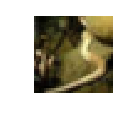

|        | Predicted Label   | Model Choice   | True Label               |
|--------+-------------------+----------------+--------------------------|
| coarse | large_carnivores  | X              | non-insect_invertebrates |
| fine   | flatfish          |                | worm                     |


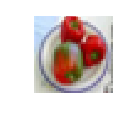

|        | Predicted Label      | Model Choice   | True Label           |
|--------+----------------------+----------------+----------------------|
| coarse | fruit_and_vegetables | X              | fruit_and_vegetables |
| fine   | apple                |                | sweet_pepper         |


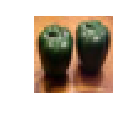

|        | Predicted Label   | Model Choice   | True Label           |
|--------+-------------------+----------------+----------------------|
| coarse | food_containers   |                | fruit_and_vegetables |
| fine   | cattle            | X              | sweet_pepper         |


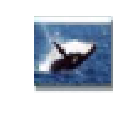

|        | Predicted Label   | Model Choice   | True Label      |
|--------+-------------------+----------------+-----------------|
| coarse | aquatic_mammals   | X              | aquatic_mammals |
| fine   | dolphin           |                | whale           |


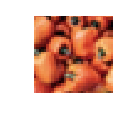

|        | Predicted Label          | Model Choice   | True Label           |
|--------+--------------------------+----------------+----------------------|
| coarse | non-insect_invertebrates | X              | fruit_and_vegetables |
| fine   | lobster                  |                | sweet_pepper         |


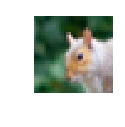

|        | Predicted Label   | Model Choice   | True Label    |
|--------+-------------------+----------------+---------------|
| coarse | insects           | X              | small_mammals |
| fine   | cattle            |                | squirrel      |


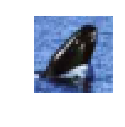

|        | Predicted Label   | Model Choice   | True Label      |
|--------+-------------------+----------------+-----------------|
| coarse | aquatic_mammals   | X              | aquatic_mammals |
| fine   | mouse             |                | whale           |


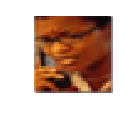

|        | Predicted Label          | Model Choice   | True Label   |
|--------+--------------------------+----------------+--------------|
| coarse | non-insect_invertebrates |                | people       |
| fine   | lobster                  | X              | woman        |


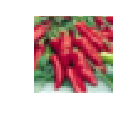

|        | Predicted Label          | Model Choice   | True Label           |
|--------+--------------------------+----------------+----------------------|
| coarse | non-insect_invertebrates |                | fruit_and_vegetables |
| fine   | poppy                    | X              | sweet_pepper         |


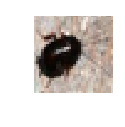

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | insects           |                | insects      |
| fine   | beetle            | X              | cockroach    |


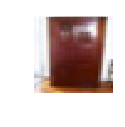

|        | Predicted Label      | Model Choice   | True Label          |
|--------+----------------------+----------------+---------------------|
| coarse | fruit_and_vegetables |                | household_furniture |
| fine   | apple                | X              | wardrobe            |


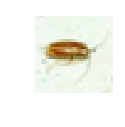

|        | Predicted Label          | Model Choice   | True Label   |
|--------+--------------------------+----------------+--------------|
| coarse | non-insect_invertebrates | X              | insects      |
| fine   | crab                     |                | cockroach    |


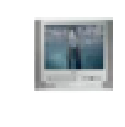

|        | Predicted Label     | Model Choice   | True Label                   |
|--------+---------------------+----------------+------------------------------|
| coarse | household_furniture |                | household_electrical_devices |
| fine   | clock               | X              | television                   |


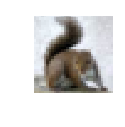

|        | Predicted Label   | Model Choice   | True Label    |
|--------+-------------------+----------------+---------------|
| coarse | large_carnivores  | X              | small_mammals |
| fine   | flatfish          |                | squirrel      |


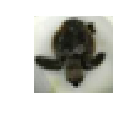

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | fish              | X              | reptiles     |
| fine   | dinosaur          |                | turtle       |


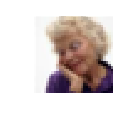

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | aquatic_mammals   | X              | people       |
| fine   | boy               |                | woman        |


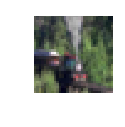

|        | Predicted Label   | Model Choice   | True Label   |
|--------+-------------------+----------------+--------------|
| coarse | vehicles_2        |                | vehicles_1   |
| fine   | lawn_mower        | X              | train        |


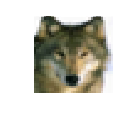

|        | Predicted Label   | Model Choice   | True Label       |
|--------+-------------------+----------------+------------------|
| coarse | large_carnivores  | X              | large_carnivores |
| fine   | leopard           |                | wolf             |


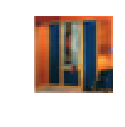

|        | Predicted Label   | Model Choice   | True Label          |
|--------+-------------------+----------------+---------------------|
| coarse | food_containers   | X              | household_furniture |
| fine   | lawn_mower        |                | wardrobe            |


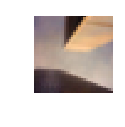

|        | Predicted Label              | Model Choice   | True Label                    |
|--------+------------------------------+----------------+-------------------------------|
| coarse | large_natural_outdoor_scenes |                | large_man-made_outdoor_things |
| fine   | cloud                        | X              | skyscraper                    |


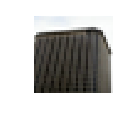

|        | Predicted Label               | Model Choice   | True Label                    |
|--------+-------------------------------+----------------+-------------------------------|
| coarse | large_man-made_outdoor_things |                | large_man-made_outdoor_things |
| fine   | castle                        | X              | skyscraper                    |


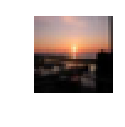

|        | Predicted Label              | Model Choice   | True Label                   |
|--------+------------------------------+----------------+------------------------------|
| coarse | large_natural_outdoor_scenes | X              | large_natural_outdoor_scenes |
| fine   | bowl                         |                | sea                          |


In [96]:
examine_images_and_predictions_pyramid(pyramid_model, X_test_C, y_test_C)